In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# configuring figure/plot params
custom_params = {'figure.figsize':(12,7)} 
sns.set_theme(style="whitegrid", rc=custom_params)

In [3]:
mnist_data = pd.read_csv('mnist.csv').values
mnist_data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

# Data Exploration

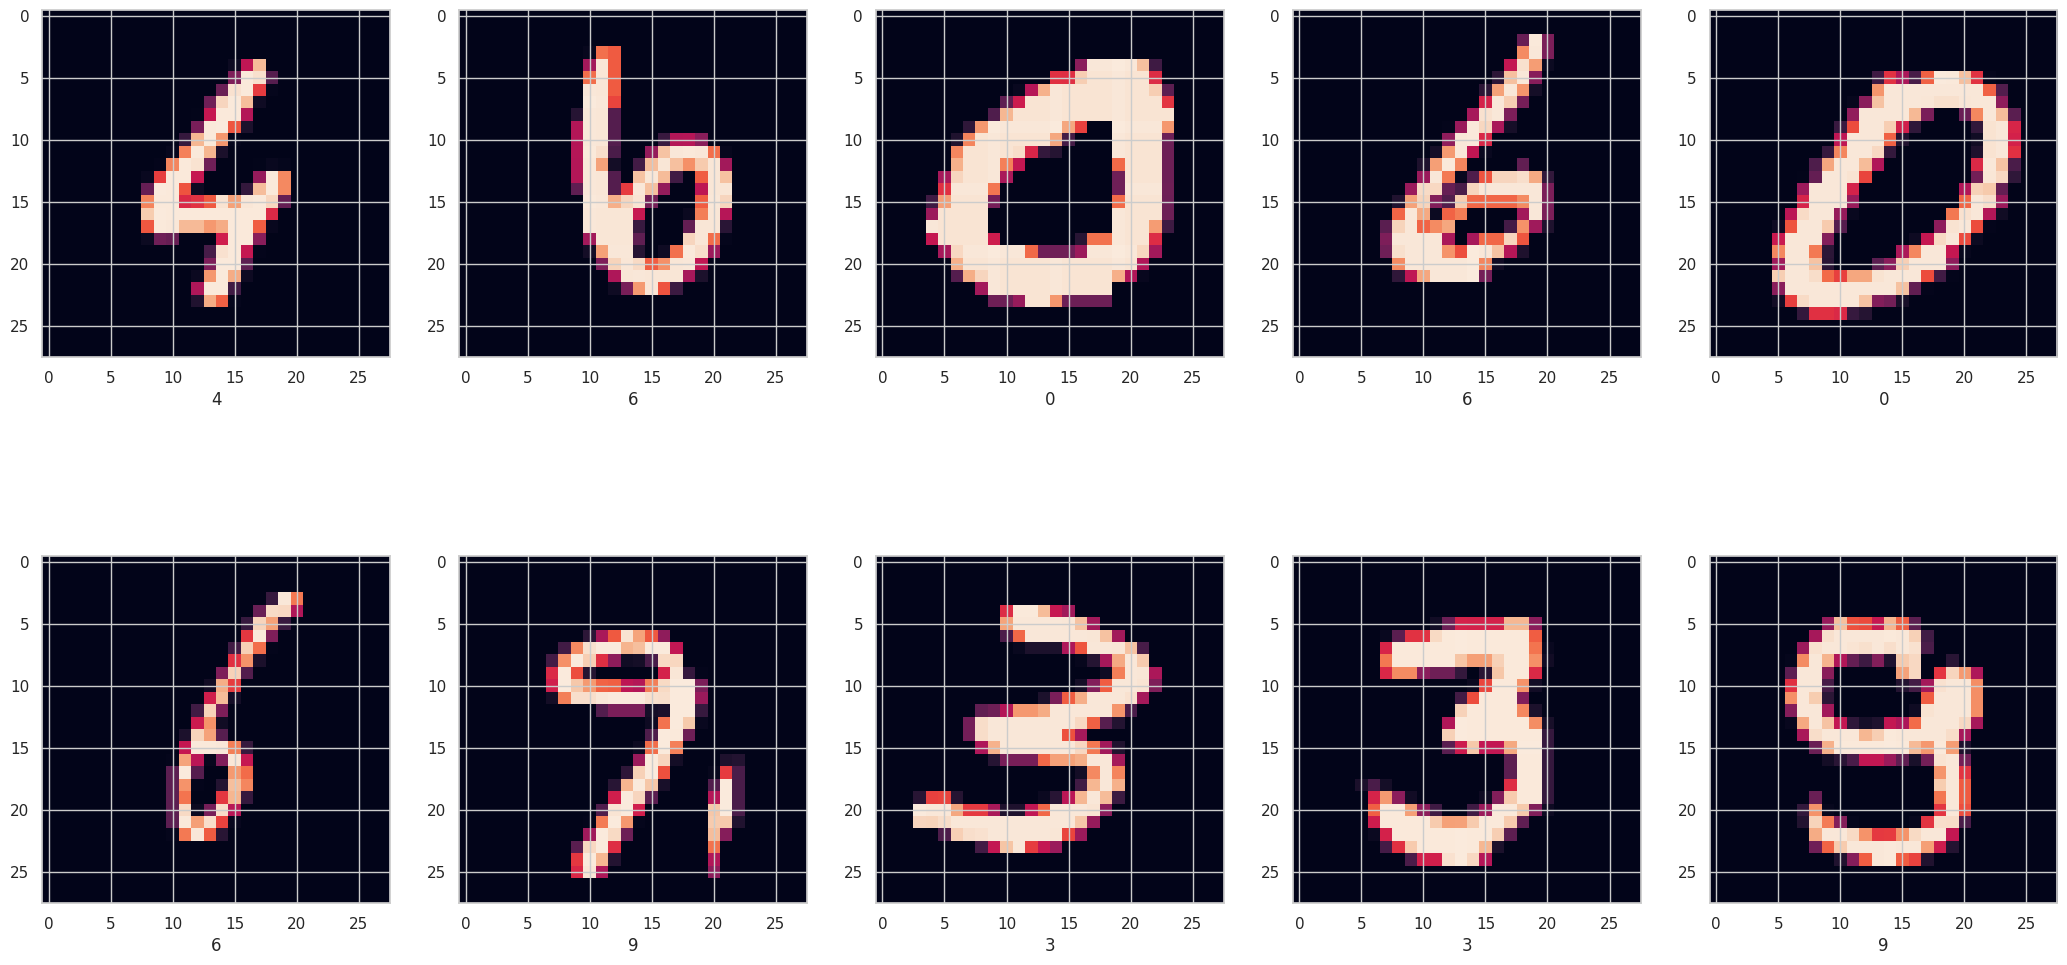

In [4]:
labels = mnist_data[:,0] # 0 to 9
digits = mnist_data[:, 1:] # 42000 digits
img_size = 28

fig = plt.figure(figsize=(26,13))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    random_index = random.randrange(0, len(digits))
    plt.imshow(digits[random_index].reshape(img_size, img_size))
    plt.xlabel(str(labels[random_index]))
plt.show()

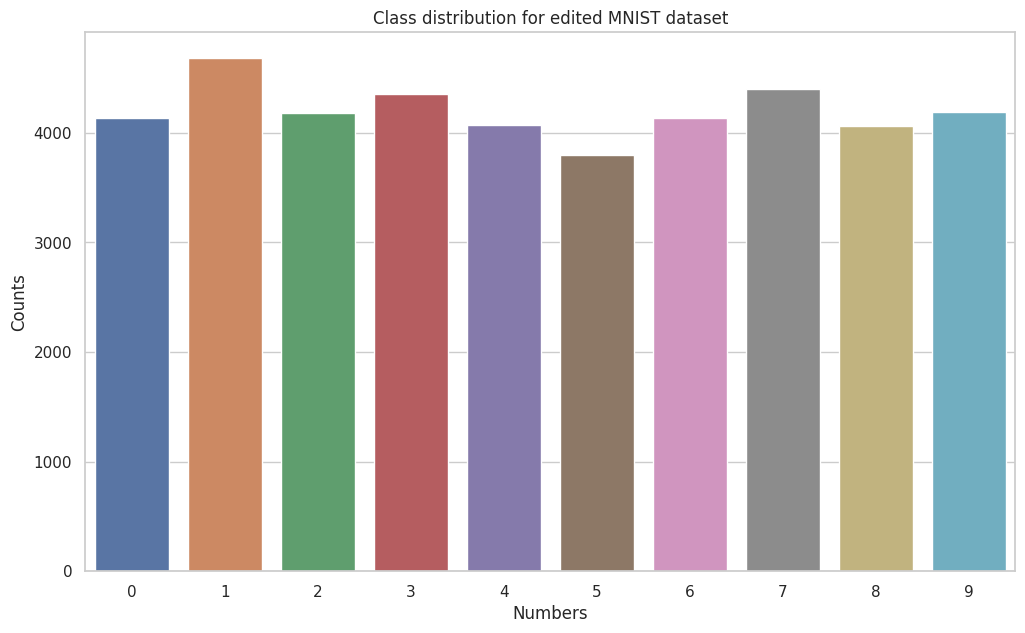

In [29]:
unique, counts = np.unique(labels, return_counts=True)
ax = sns.barplot(x=unique,y=counts)
plt.title("Class distribution for edited MNIST dataset")
plt.ylabel("Counts")
plt.xlabel("Numbers")
plt.show()

## Pipeline Setup
(Scaled to zero mean/unit standard deviation) Multinomial Logit Model -> Ink Feature


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale



# INK Feature

In [31]:
# create ink feature
ink = np.array([sum(row) for row in digits])
# compute mean for each digit class
ink_mean = [np.mean(ink[labels == i]) for i in range(10)]
# compute standard deviation for each digit class
ink_std = [np.std(ink[labels == i]) for i in range(10)]